#### Here I am implementing KNN classifier using the famous inbuilt iris dataset in sklearn

In [9]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import time
from scipy.stats import mode

In [5]:
# loading dataset
df=load_iris()
X=df.data
y=df.target

In [6]:
# defining split point for splitting data into training and testing set
train_test_split_percent=0.75

In [7]:
# creating train and test sets
n=X.shape[0]
X_train=X[:int(train_test_split_percent*n),:]
X_test=X[int(train_test_split_percent*n):,:]
y_train=y[:int(train_test_split_percent*n)]
y_test=y[int(train_test_split_percent*n):]

#### Steps are as follows:
1. Define a function to calculate distance between 2 points.
2. Use this function to get distance between test point and all data points
3. Sort distance measurements to find the points closest to the test point (i.e., find the nearest neighbors)
4. Use majority class labels of those closest points to predict the label of the test point


In [8]:
# Here I am defining a minkowski function i.e here d=(x[i]-y[i])**p where p can be 1. 2
def minkowski_dist(a,b,p=1):
    n=len(a)
    dist=0
    for i in range(n):
        dist+=abs(a[i]-b[i])**p
    dist=dist**(1/p)
    return dist

In [12]:
# making a function to calculate knn
def knn(X_train,y_train,X_test,k):
    y_preds=[]
    for i in X_test:
        dist=[]
        for j in range(len(X_train)):
            # here I am giving 3rd parameter as 2 in minkowski distance to return euclidean distance. If I gave 1 it returns manhattan distancce
            distances=minkowski_dist(np.array(X_train[j,:]),i,2)
            dist.append(distances)
        dist=np.array(dist)
        # Sort the array
        sorted_dist=np.argsort(dist)[:k]
        labels=y[sorted_dist]
        lab=mode(labels)
        lab=lab.mode[0]
        y_preds.append(lab)
    return y_preds

In [16]:

#Applying our function by randomly choosing k=7 and calculating metrics
from sklearn.metrics import accuracy_score
y_pred = knn(X_train,y_train,X_test , 7)
accuracy_score(y_test,y_pred)

0.7368421052631579

Text(0, 0.5, 'Accuracy in %')

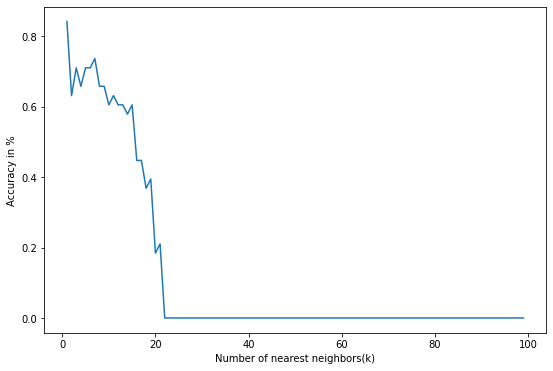

In [17]:
# Obtaining acuracy score on a variety of values of k
start=time.process_time()
accuracy=[]
for k in range(1,100):
    y_pred=knn(X_train,y_train,X_test,k)
    accuracy.append(accuracy_score(y_test,y_pred))
# plotting
fig,ax=plt.subplots(figsize=(9,6))
ax.plot(range(1,100),accuracy)
ax.set_xlabel("Number of nearest neighbors(k)")
ax.set_ylabel("Accuracy in %")


#### So we can infer that using value of k less than 10 gives good results.